In [1]:
import time
import numpy as np
import seaborn as sns
from numpy import linalg as LA
import matplotlib.pyplot as plt

sns.set_theme()

## Multivariate Gaussian Distribution

The multivariate Gaussian distribution, also known as the multivariate normal distribution, is a generalization of the univariate normal distribution to higher dimensions.

### Probability Density Function (PDF)

A random vector $X = (X_1, \ldots, X_p)$ follows a p-variate normal distribution with parameters $\mu \in \mathbb{R}^p$ and $\Sigma \in \mathbb{R}^{p \times p}$. We denote this as $X \sim \mathcal{N}_p(\mu, \Sigma)$ if the pdf of $X$ is given by:

$$
f_X(x) = \frac{1}{{(2\pi)^{p/2} \sqrt{\text{det}(\Sigma)}}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$


where $\mu$ is the mean vector of the distribution, and $\Sigma$ the covariance matrix.

In [2]:
def multivariate_gaussian(x, mu, sigma):
    p = len(x)
    normalization_factor = 1/(np.power(2*np.pi, p/2) * (np.sqrt(LA.det(sigma))))
    squared_mahalanobis_distance = -0.5 * np.matmul(np.matmul((x - mu), LA.inv(sigma)),((x - mu).reshape(-1,1)))
    return (normalization_factor * np.exp(squared_mahalanobis_distance)).item()

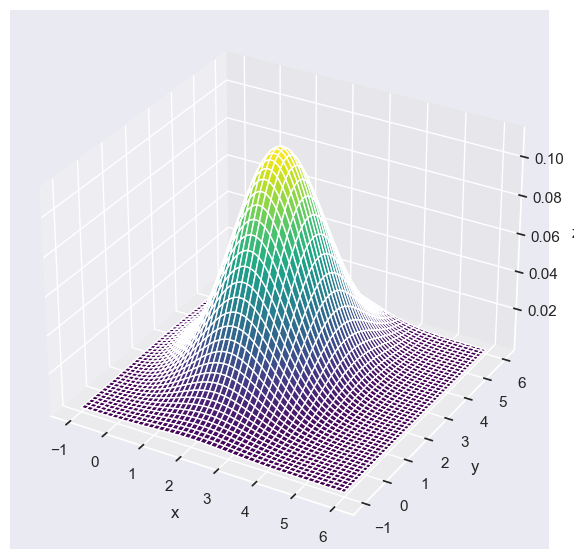

In [3]:
x = np.linspace(-1,6,200)
y = np.linspace(-1,6,200)

mean = np.array([2.0, 3.0])
cov = np.array([[1, 0], [0, 2]])

xv, yv = np.meshgrid(x, y)
combined_grid = np.vstack([xv.ravel(), yv.ravel()])
z = np.array([multivariate_gaussian(x, mean, cov) for x in combined_grid.T])
z = z.reshape(xv.shape)

ax = plt.figure(figsize=(10, 7)).add_subplot(projection='3d')
ax.plot_surface(xv, yv, z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## x ~ $\mathcal{N}$($\mu$, $\Sigma$)

Sampling from a multivariate Gaussian distribution return a cloud of points centered around $\mu$ with shape defined by the covariance matrix $\Sigma$

The function $\phi(x)=-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)$ is a quadratic form with the covariance matrix $\Sigma$ that is always symmetric and positive semidefinite.

In [14]:
from scipy.stats import multivariate_normal

In [41]:
def plot_samples(mean, cov, sample_size=200, plot_contour=False, **kwargs):
    samples = np.random.multivariate_normal(mean, cov, sample_size)
    
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=samples[:, 0], y=samples[:, 1])
    
    eigenvalues, eigenvectors = LA.eig(cov)
    
    norm_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

    for i in range(len(eigenvalues)):
        plt.quiver(*mean, *(norm_eigenvectors[i]*np.sqrt(eigenvalues[i])), color='red', angles='xy', scale_units='xy', scale=1, width=.005)

    
    plt.xlabel('x')
    plt.ylabel('y')

    xlim_min = kwargs.get('xlim_min', np.floor(np.min(samples[..., 0].ravel())) - 5)
    xlim_max = kwargs.get('xlim_max', np.ceil(np.max(samples[..., 0].ravel())) + 5)
    ylim_min = kwargs.get('ylim_min', np.floor(np.min(samples[..., 1].ravel())) - 5)
    ylim_max = kwargs.get('ylim_max', np.ceil(np.max(samples[..., 1].ravel())) + 5)
    
    if plot_contour: 
        x, y = np.mgrid[xlim_min:xlim_max:.01, ylim_min:ylim_max:.01]
        points = np.dstack((x, y))
        rv = multivariate_normal(mean, cov)
        plt.contourf(x, y, rv.pdf(points), levels=50, cmap='viridis', alpha=0.4)
    
    plt.xlim(xlim_min, xlim_max)
    plt.ylim(ylim_min, ylim_max)

    plt.title("Random samples")
    plt.show()

In [48]:
def print_eigs(matrix):
    eigenvalues, eigenvectors = LA.eig(matrix)
    for i in range(len(eigenvalues)):
        print(f"Eigenvalue: {eigenvalues[i]:.2f} -> Eigenvector: {eigenvectors[i]}")

Eigenvalue: 1.00 -> Eigenvector: [1. 0.]
Eigenvalue: 1.00 -> Eigenvector: [0. 1.]


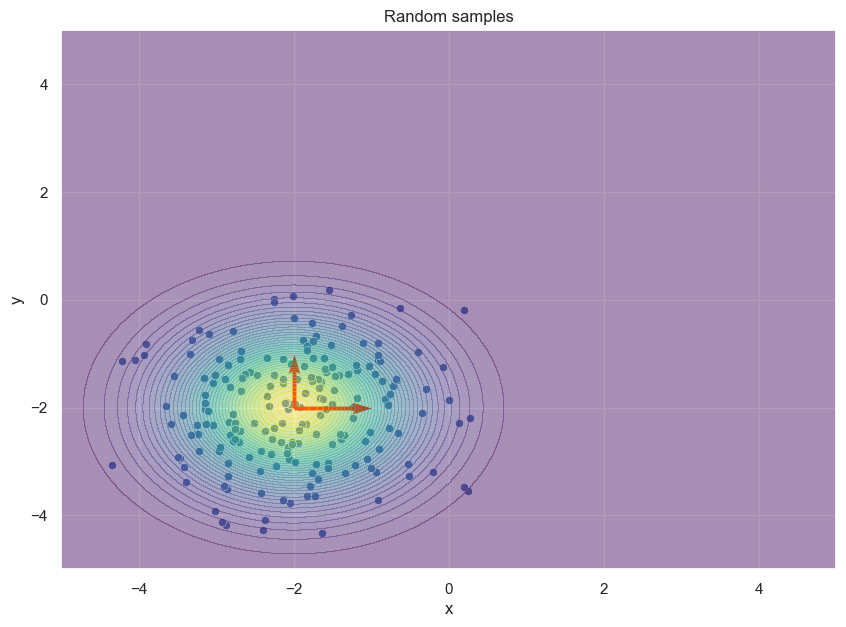

In [49]:
mean = np.array([-2.0, -2.0])
cov = np.array([[1, 0], [0, 1]])
print_eigs(cov)

plot_samples(mean, cov, plot_contour=True, xlim_min=-5, xlim_max=5, ylim_min=-5, ylim_max=5)

Eigenvalue: 1.00 -> Eigenvector: [1. 0.]
Eigenvalue: 8.00 -> Eigenvector: [0. 1.]


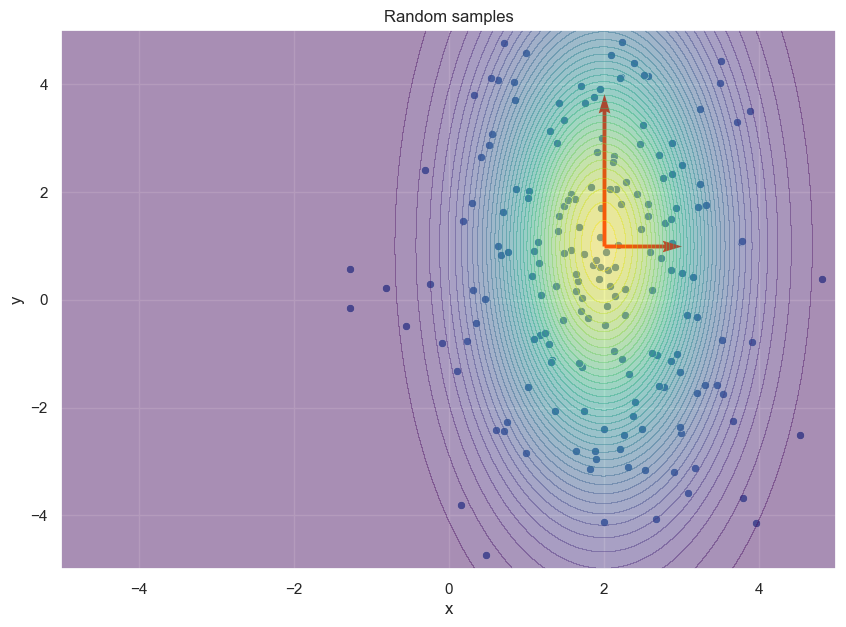

In [50]:
mean = np.array([2.0, 1.0])
cov = np.array([[1, 0], [0, 8]])
print_eigs(cov)

plot_samples(mean, cov, plot_contour=True, xlim_min=-5, xlim_max=5, ylim_min=-5, ylim_max=5)

Eigenvalue: 2.44 -> Eigenvector: [-0.78820544 -0.61541221]
Eigenvalue: 6.56 -> Eigenvector: [ 0.61541221 -0.78820544]


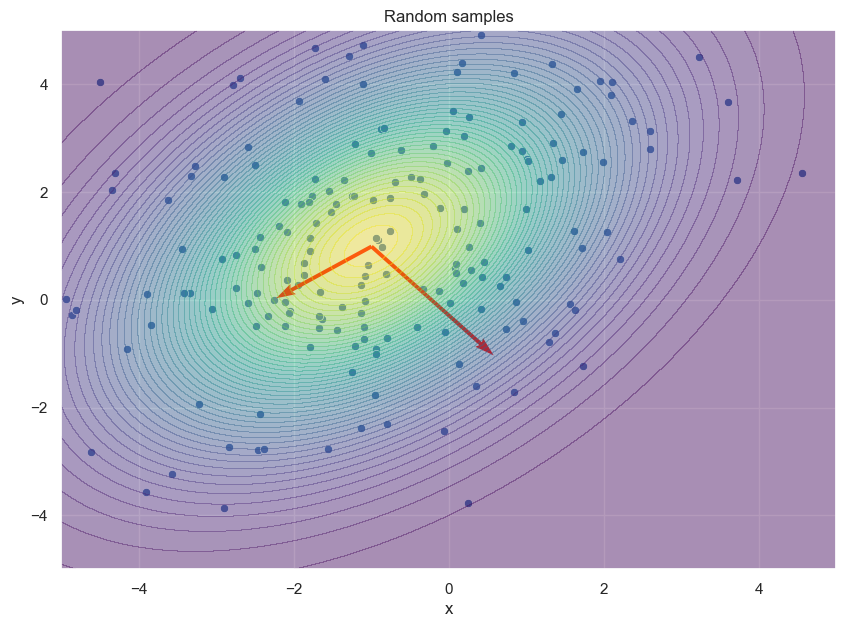

In [51]:
mean = np.array([-1.0, 1.0])
cov = np.array([[4, 2], [2, 5]])
print_eigs(cov)

plot_samples(mean, cov, plot_contour=True, xlim_min=-5, xlim_max=5, ylim_min=-5, ylim_max=5)